In [1]:
import pandas as pd
import numpy as np
import sys
import time  # Optional, for demonstration purposes


# Define chunk size (adjust based on memory availability)
chunk_size = 250000
know_df_size = "10,000,000"  # This is just a label for display

# Track the number of processed rows and store chunks
processed_rows = 0
chunks = []

# Process CSV in chunks
for chunk in pd.read_csv("data/flight_delay_train.csv", chunksize=chunk_size, low_memory=False):
    # Replace '?' with NaN for proper missing value handling
    chunk.replace("?", np.nan, inplace=True)
    
    # Update the processed rows counter
    processed_rows += len(chunk)
    
    # Append this chunk to the list
    chunks.append(chunk)
    
    # Print the progress on the same line
    sys.stdout.write(f"\rProcessed {processed_rows:,} rows out of {know_df_size} ...")
    sys.stdout.flush()

# New line after finishing
print()

# Combine all chunks into a full DataFrame (if needed)
df_train = pd.concat(chunks, ignore_index=True)

# Check the final DataFrame shape
print("Final Data Shape:", df_train.shape)


Processed 10,000,000 rows out of 10,000,000 ...
Final Data Shape: (10000000, 9)


In [2]:
import pandas as pd
import numpy as np
import sys
import time  # Optional, for demonstration purposes


# Define chunk size (adjust based on memory availability)
chunk_size = 250000
know_df_size = "100,000"  # This is just a label for display

# Track the number of processed rows and store chunks
processed_rows = 0
chunks = []

# Process CSV in chunks
for chunk in pd.read_csv("data/flight_delay_test.csv", chunksize=chunk_size, low_memory=False):
    # Replace '?' with NaN for proper missing value handling
    chunk.replace("?", np.nan, inplace=True)
    
    # Update the processed rows counter
    processed_rows += len(chunk)
    
    # Append this chunk to the list
    chunks.append(chunk)
    
    # Print the progress on the same line
    sys.stdout.write(f"\rProcessed {processed_rows:,} rows out of {know_df_size} ...")
    sys.stdout.flush()

# New line after finishing
print()

# Combine all chunks into a full DataFrame (if needed)
df_test = pd.concat(chunks, ignore_index=True)

# Check the final DataFrame shape
print("Final Data Shape:", df_test.shape)


Processed 100,000 rows out of 100,000 ...
Final Data Shape: (100000, 9)


In [3]:
#Print info 
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              object 
 1   DayofMonth         object 
 2   DayOfWeek          object 
 3   DepTime            float64
 4   UniqueCarrier      object 
 5   Origin             object 
 6   Dest               object 
 7   Distance           int64  
 8   dep_delayed_15min  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 686.6+ MB
None


In [4]:
#Print info 
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              100000 non-null  object 
 1   DayofMonth         100000 non-null  object 
 2   DayOfWeek          100000 non-null  object 
 3   DepTime            100000 non-null  float64
 4   UniqueCarrier      100000 non-null  object 
 5   Origin             100000 non-null  object 
 6   Dest               100000 non-null  object 
 7   Distance           100000 non-null  int64  
 8   dep_delayed_15min  100000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB
None


In [5]:
obj_columns = df_train.select_dtypes(include=['object']).columns.tolist()
print("Object columns", obj_columns)

Object columns ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'dep_delayed_15min']


In [6]:
df_train[obj_columns] = df_train[obj_columns].astype('category')
df_test[obj_columns] = df_test[obj_columns].astype('category')


print(df_train.info())

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Month              category
 1   DayofMonth         category
 2   DayOfWeek          category
 3   DepTime            float64 
 4   UniqueCarrier      category
 5   Origin             category
 6   Dest               category
 7   Distance           int64   
 8   dep_delayed_15min  category
dtypes: category(7), float64(1), int64(1)
memory usage: 238.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Month              100000 non-null  category
 1   DayofMonth         100000 non-null  category
 2   DayOfWeek          100000 non-null  category
 3   DepTime            100000 non-null  float64 
 4   UniqueCarrier      100000 non-null  cate

In [7]:
# Convert 'dep_delayed_15min' column to binary (1 for "Y", 0 for "N")
df_train["dep_delayed_15min"] = df_train["dep_delayed_15min"].map({"Y": 1, "N": 0}).astype(int)
df_test["dep_delayed_15min"] = df_test["dep_delayed_15min"].map({"Y": 1, "N": 0}).astype(int)


print(df_train.head())

  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0   c-6        c-8       c-4    603.0            UA    RNO  DEN       804   
1   c-6        c-9       c-5    610.0            YV    PNS  CLT       488   
2   c-1       c-17       c-2   1914.0            XE    IAH  ELP       667   
3   c-2       c-16       c-3    712.0            AA    ICT  DFW       328   
4   c-7        c-4       c-1   1005.0            CO    PHX  IAH      1009   

   dep_delayed_15min  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [8]:
import pandas as pd

# Select categorical columns
categorical_columns = df_train.select_dtypes(include=['category']).columns.tolist()

# One-hot encode categorical columns (Train)
df_train_cat_encoded = pd.get_dummies(
    df_train[categorical_columns],
    sparse=True,
    dtype='uint8'
)

# One-hot encode categorical columns (Test)
df_test_cat_encoded = pd.get_dummies(
    df_test[categorical_columns],
    sparse=True,
    dtype='uint8'
)

# Ensure test set has the same columns as train (fix column mismatch issue)
df_test_cat_encoded = df_test_cat_encoded.reindex(columns=df_train_cat_encoded.columns, fill_value=0)

# Convert each column to sparse before converting to COO matrix
df_train_cat_encoded = df_train_cat_encoded.astype(pd.SparseDtype("uint8", fill_value=0))
df_test_cat_encoded = df_test_cat_encoded.astype(pd.SparseDtype("uint8", fill_value=0))


# Print statistics
print(f"Train Encoded Shape: {df_train_cat_encoded.shape}")
print(f"Test Encoded Shape: {df_test_cat_encoded.shape}")
print(f"Train Memory Usage: {df_train_cat_encoded.memory_usage(deep=True).sum() / 1e9:.2f} GB")
print(f"Test Memory Usage: {df_test_cat_encoded.memory_usage(deep=True).sum() / 1e9:.2f} GB")


Train Encoded Shape: (10000000, 666)
Test Encoded Shape: (100000, 666)
Train Memory Usage: 0.30 GB
Test Memory Usage: 0.00 GB


In [9]:
continuous_columns = [col for col in df_train.columns if col not in categorical_columns]

# Remove "Claim_Amount" and "Claim_Binary" from continuous_columns list
continuous_columns = [col for col in continuous_columns if col not in ["dep_delayed_15min"]]


print("Continuous columns:", continuous_columns)

df_train_cont = df_train[continuous_columns]
df_test_cont = df_test[continuous_columns]

# Check the processed DataFrame
print(df_train_cont.info())  # Verify data types
print(df_train_cont.head())  # Verify values

# Check the processed DataFrame
print(df_test_cont.info())  # Verify data types
print(df_test_cont.head())  # Verify values

Continuous columns: ['DepTime', 'Distance']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   DepTime   float64
 1   Distance  int64  
dtypes: float64(1), int64(1)
memory usage: 152.6 MB
None
   DepTime  Distance
0    603.0       804
1    610.0       488
2   1914.0       667
3    712.0       328
4   1005.0      1009
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DepTime   100000 non-null  float64
 1   Distance  100000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.5 MB
None
   DepTime  Distance
0   1802.0      1040
1   2011.0       184
2   1145.0       189
3   1014.0       834
4    828.0      1953


In [10]:
import scipy.sparse as sp
from scipy.sparse import hstack

# Convert the sparse DataFrame (from one-hot encoding) to a SciPy sparse matrix.
X_train_cat_sparse = df_train_cat_encoded.sparse.to_coo()

# Convert continuous (dense) features to a NumPy array.
X_train_cont_dense = df_train_cont.values

# Combine horizontally: first the dense columns, then the sparse one-hot encoded columns.
# Note: hstack can combine a dense NumPy array with a sparse matrix.
X_train = hstack([X_train_cont_dense, X_train_cat_sparse], format='csr')

# Convert the sparse DataFrame (from one-hot encoding) to a SciPy sparse matrix.
X_test_cat_sparse = df_test_cat_encoded.sparse.to_coo()

# Convert continuous (dense) features to a NumPy array.
X_test_cont_dense = df_test_cont.values

# Combine horizontally: first the dense columns, then the sparse one-hot encoded columns.
# Note: hstack can combine a dense NumPy array with a sparse matrix.
X_test = hstack([X_test_cont_dense, X_test_cat_sparse], format='csr')

In [11]:
# Extract the target; if it's a column in df, for example:
y_train = df_train["dep_delayed_15min"]

# Extract the target; if it's a column in df, for example:
y_test = df_test["dep_delayed_15min"]

In [12]:
# Check the shapes to verify the split:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train shape: (10000000, 668)
X_test shape: (100000, 668)
y_train length: 10000000
y_test length: 100000


In [13]:
n_rows, n_cols = X_train.shape
sparse_rate = 1 - (X_train.nnz / (n_rows * n_cols))
print("Overall sparse rate:", sparse_rate)


Overall sparse rate: 0.9880239520958084


In [14]:
import lightgbm as lgb
import time

# Define LightGBM Parameters
params_with_efb = {
    'objective': 'binary',
    'metric': 'auc',
    'verbose': 1,
    'data_sample_strategy': 'goss',
    'top_rate': 0.1,   # Alpha: Retain top 5% highest gradients
    'other_rate': 0.1,  # Beta: Sample 5% of smaller gradients
    #'max_bin': 64,  # Controls feature binning
    #'max_conflict_rate': 0.8,  # Adjust conflict tolerance
    #'force_col_wise': True,  # Force column-wise histogram (can help bundling)
    'force_row_wise': True,
    'enable_bundle':True
}

# Create LightGBM Datasets
train_data_with_efb = lgb.Dataset(X_train, y_train,  params={'enable_bundle': True})
valid_data_with_efb = lgb.Dataset(X_test, y_test, params={'enable_bundle': True})

print("Training LightGBM Model with EFB Enabled...")
start_time_with_efb = time.time()

# Dictionary to store evaluation results
evals_result_with_efb = {}

# Train the model with EFB
model_with_efb = lgb.train(
    params_with_efb,
    train_data_with_efb,
    valid_sets=[valid_data_with_efb],
    valid_names=['validation'],
    num_boost_round=2000,
    callbacks=[
        lgb.record_evaluation(evals_result_with_efb),
        lgb.early_stopping(stopping_rounds=20, verbose=True)
    ]
)

training_time_with_efb = time.time() - start_time_with_efb
best_iter_with_efb = model_with_efb.best_iteration

print(f"\nLightGBM Model with EFB Enabled Training Complete. Best Iteration: {best_iter_with_efb}")
print(f"Training Time: {training_time_with_efb:.4f} seconds")

Training LightGBM Model with EFB Enabled...
[LightGBM] [Info] Number of positive: 1928099, number of negative: 8071901
[LightGBM] [Info] Total Bins 1814
[LightGBM] [Info] Number of data points in the train set: 10000000, number of used features: 654
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192810 -> initscore=-1.431854
[LightGBM] [Info] Start training from score -1.431854
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1890]	validation's auc: 0.768731

LightGBM Model with EFB Enabled Training Complete. Best Iteration: 1890
Training Time: 262.4898 seconds


In [15]:
# Define LightGBM Parameters (EFB Disabled)
params_without_efb = {
    'objective': 'binary',
    'metric': 'auc',
    'verbose': 1,
}

# Create LightGBM Datasets
train_data_without_efb = lgb.Dataset(X_train, y_train, params={'enable_bundle': False})
valid_data_without_efb = lgb.Dataset(X_test, y_test, params={'enable_bundle': False})

print("Training LightGBM Model with EFB Disabled...")
start_time_without_efb = time.time()

# Dictionary to store evaluation results
evals_result_without_efb = {}

# Train the model without EFB
model_without_efb = lgb.train(
    params_without_efb,
    train_data_without_efb,
    valid_sets=[valid_data_without_efb],
    valid_names=['validation'],
    num_boost_round=2000,
    callbacks=[
        lgb.record_evaluation(evals_result_without_efb),
        lgb.early_stopping(stopping_rounds=20, verbose=True)
    ]
)

training_time_without_efb = time.time() - start_time_without_efb
best_iter_without_efb = model_without_efb.best_iteration

print(f"\nLightGBM Model with EFB Disabled Training Complete. Best Iteration: {best_iter_without_efb}")
print(f"Training Time: {training_time_without_efb:.4f} seconds")

Training LightGBM Model with EFB Disabled...
[LightGBM] [Info] Number of positive: 1928099, number of negative: 8071901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.242541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1814
[LightGBM] [Info] Number of data points in the train set: 10000000, number of used features: 654
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192810 -> initscore=-1.431854
[LightGBM] [Info] Start training from score -1.431854
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[504]	validation's auc: 0.749495

LightGBM Model with EFB Disabled Training Complete. Best Iteration: 504
Training Time: 179.4508 seconds


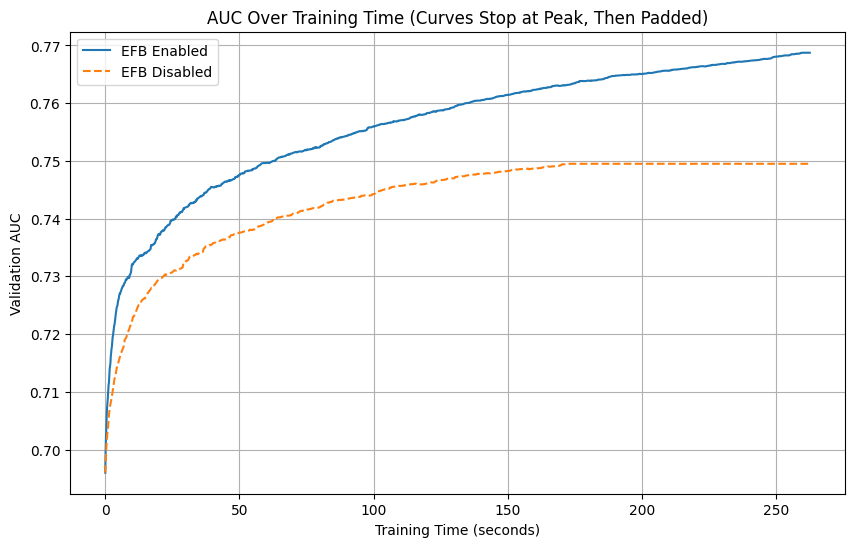

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these variables are already defined:
#   - evals_result_with_efb, evals_result_without_efb
#   - training_time_with_efb, training_time_without_efb

# Extract AUC values and generate original time arrays (one per iteration)
auc_with_efb = np.array(evals_result_with_efb['validation']['auc'])
auc_without_efb = np.array(evals_result_without_efb['validation']['auc'])

time_with_efb = np.linspace(0, training_time_with_efb, len(auc_with_efb))
time_without_efb = np.linspace(0, training_time_without_efb, len(auc_without_efb))

# Identify the peak (best) AUC index and its corresponding time for each model
peak_idx_with = np.argmax(auc_with_efb)
peak_idx_without = np.argmax(auc_without_efb)

peak_time_with = time_with_efb[peak_idx_with]
peak_time_without = time_without_efb[peak_idx_without]

peak_auc_with = auc_with_efb[peak_idx_with]
peak_auc_without = auc_without_efb[peak_idx_without]

# Determine the longest total training time among the two models
max_time = max(training_time_with_efb, training_time_without_efb)

# Define a function to extend a curve to the max_time with a constant value
def extend_curve(time_array, auc_array, peak_time, peak_auc, max_time, num_points=10):
    # Keep points up to (and including) the peak
    time_up_to_peak = time_array[time_array <= peak_time]
    auc_up_to_peak = auc_array[:len(time_up_to_peak)]
    
    # Only add padding if the peak time is less than max_time
    if peak_time < max_time:
        # Create additional time points from the peak to max_time.
        # We use num_points (minus 1 to avoid duplicating the peak_time) extra points.
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_auc = np.full_like(extra_time, peak_auc)
        
        # Concatenate the original (up-to-peak) values with the padded extra points
        extended_time = np.concatenate([time_up_to_peak, extra_time])
        extended_auc = np.concatenate([auc_up_to_peak, extra_auc])
    else:
        extended_time = time_up_to_peak
        extended_auc = auc_up_to_peak
    
    return extended_time, extended_auc

# Extend both curves so that they run until max_time using the constant peak value thereafter
ext_time_with, ext_auc_with = extend_curve(time_with_efb, auc_with_efb, peak_time_with, peak_auc_with, max_time)
ext_time_without, ext_auc_without = extend_curve(time_without_efb, auc_without_efb, peak_time_without, peak_auc_without, max_time)

# Now plot both curves
plt.figure(figsize=(10, 6))
plt.plot(ext_time_with, ext_auc_with, label='EFB Enabled', linestyle='-')
plt.plot(ext_time_without, ext_auc_without, label='EFB Disabled', linestyle='--')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation AUC")
plt.title("AUC Over Training Time (Curves Stop at Peak, Then Padded)")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import xgboost as xgb
import time  # ensure you have imported time

# For histogram splitting
params_xgb_hist = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 1,
    'tree_method': 'hist'  # Use histogram-based splitting
}


# Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

print("Training XGBoost Model Histogram...")
start_time_xgb = time.time()

# Dictionary to store evaluation results
evals_result_xgb_hist = {}

# Train the model
model_xgb = xgb.train(
    params_xgb_hist,
    dtrain,
    num_boost_round=2000,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=20,
    evals_result=evals_result_xgb_hist,
    verbose_eval=True
)

training_time_xgb = time.time() - start_time_xgb
best_iter_xgb = model_xgb.best_iteration

print(f"\nXGBoost Model Training Complete. Best Iteration: {best_iter_xgb}")
print(f"Training Time: {training_time_xgb:.4f} seconds")

Training XGBoost Model Histogram...
[0]	validation-auc:0.70020
[1]	validation-auc:0.70563
[2]	validation-auc:0.70882
[3]	validation-auc:0.71072
[4]	validation-auc:0.71221
[5]	validation-auc:0.71317
[6]	validation-auc:0.71493
[7]	validation-auc:0.71685
[8]	validation-auc:0.72009
[9]	validation-auc:0.72188
[10]	validation-auc:0.72278
[11]	validation-auc:0.72321
[12]	validation-auc:0.72385
[13]	validation-auc:0.72485
[14]	validation-auc:0.72598
[15]	validation-auc:0.72633
[16]	validation-auc:0.72674
[17]	validation-auc:0.72703
[18]	validation-auc:0.72805
[19]	validation-auc:0.72856
[20]	validation-auc:0.72918
[21]	validation-auc:0.72995
[22]	validation-auc:0.73040
[23]	validation-auc:0.73059
[24]	validation-auc:0.73049
[25]	validation-auc:0.73069
[26]	validation-auc:0.73118
[27]	validation-auc:0.73133
[28]	validation-auc:0.73148
[29]	validation-auc:0.73188
[30]	validation-auc:0.73230
[31]	validation-auc:0.73283
[32]	validation-auc:0.73334
[33]	validation-auc:0.73345
[34]	validation-auc:0.

In [18]:
# Alternatively, for exact splitting
params_xgb_exact = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 1,
    'tree_method': 'exact'  # Use exact splitting
}

print("Training XGBoost Model Exact...")
start_time_xgb_exact = time.time()

# Dictionary to store evaluation results
evals_result_xgb_exact = {}

# Train the model
model_xgb_exact = xgb.train(
    params_xgb_exact,
    dtrain,
    num_boost_round=100,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=10,
    evals_result=evals_result_xgb_exact,
    verbose_eval=True
)

training_time_xgb_exact = time.time() - start_time_xgb_exact
best_iter_xgb_exact = model_xgb_exact.best_iteration

print(f"\nXGBoost Model Training Complete. Best Iteration: {best_iter_xgb_exact}")
print(f"Training Time: {training_time_xgb_exact:.4f} seconds")

Training XGBoost Model Exact...
[0]	validation-auc:0.70189
[1]	validation-auc:0.70630
[2]	validation-auc:0.70873
[3]	validation-auc:0.71261
[4]	validation-auc:0.71413
[5]	validation-auc:0.71476
[6]	validation-auc:0.71672
[7]	validation-auc:0.71837
[8]	validation-auc:0.71906
[9]	validation-auc:0.72096
[10]	validation-auc:0.72267
[11]	validation-auc:0.72278
[12]	validation-auc:0.72420
[13]	validation-auc:0.72481
[14]	validation-auc:0.72541
[15]	validation-auc:0.72671
[16]	validation-auc:0.72673
[17]	validation-auc:0.72726
[18]	validation-auc:0.72802
[19]	validation-auc:0.72832
[20]	validation-auc:0.72866
[21]	validation-auc:0.72903
[22]	validation-auc:0.72992
[23]	validation-auc:0.73027
[24]	validation-auc:0.73013
[25]	validation-auc:0.73023
[26]	validation-auc:0.73134
[27]	validation-auc:0.73168
[28]	validation-auc:0.73222
[29]	validation-auc:0.73263
[30]	validation-auc:0.73293
[31]	validation-auc:0.73322
[32]	validation-auc:0.73358
[33]	validation-auc:0.73391
[34]	validation-auc:0.7344

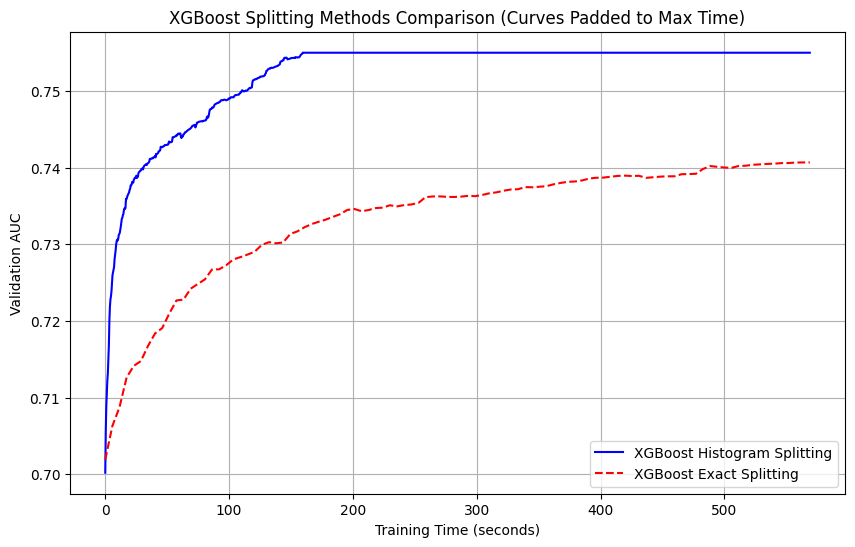

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# --- XGBoost Histogram Splitting ---
# Extract AUC values and generate time stamps for histogram splitting model
auc_hist = np.array(evals_result_xgb_hist['validation']['auc'])
time_per_iter_hist = np.linspace(0, training_time_xgb, len(auc_hist))

# --- XGBoost Exact Splitting ---
# Extract AUC values and generate time stamps for exact splitting model
auc_exact = np.array(evals_result_xgb_exact['validation']['auc'])
time_per_iter_exact = np.linspace(0, training_time_xgb_exact, len(auc_exact))

# Determine the maximum training time between the two models
max_time = max(training_time_xgb, training_time_xgb_exact)

def extend_curve(time_array, auc_array, max_time, num_points=10):
    """
    Extends a learning curve to max_time by padding with a flat line at the peak AUC.
    
    Parameters:
      - time_array: Array of time stamps per iteration.
      - auc_array: Array of AUC values.
      - max_time: The time value to which the curve should be extended.
      - num_points: Number of additional points for the padded segment.
      
    Returns:
      - extended_time: The extended time array.
      - extended_auc: The extended AUC array.
    """
    # Find the index and values at the peak AUC
    peak_index = np.argmax(auc_array)
    peak_time = time_array[peak_index]
    peak_auc = auc_array[peak_index]
    
    # Retain data up to (and including) the peak
    time_up_to_peak = time_array[:peak_index+1]
    auc_up_to_peak = auc_array[:peak_index+1]
    
    # If the peak is reached before max_time, create padding with constant AUC
    if peak_time < max_time:
        # Create additional time points from the peak time to max_time
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_auc = np.full_like(extra_time, peak_auc)
        
        # Concatenate the original curve (up to the peak) with the padding points
        extended_time = np.concatenate([time_up_to_peak, extra_time])
        extended_auc = np.concatenate([auc_up_to_peak, extra_auc])
    else:
        extended_time = time_up_to_peak
        extended_auc = auc_up_to_peak
        
    return extended_time, extended_auc

# Extend the curves for both models
ext_time_hist, ext_auc_hist = extend_curve(time_per_iter_hist, auc_hist, max_time)
ext_time_exact, ext_auc_exact = extend_curve(time_per_iter_exact, auc_exact, max_time)

# --- Combined Plot ---
plt.figure(figsize=(10, 6))
plt.plot(ext_time_hist, ext_auc_hist, label='XGBoost Histogram Splitting', color='blue', linestyle='-')
plt.plot(ext_time_exact, ext_auc_exact, label='XGBoost Exact Splitting', color='red', linestyle='--')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation AUC")
plt.title("XGBoost Splitting Methods Comparison (Curves Padded to Max Time)")
plt.legend()
plt.grid(True)
plt.show()


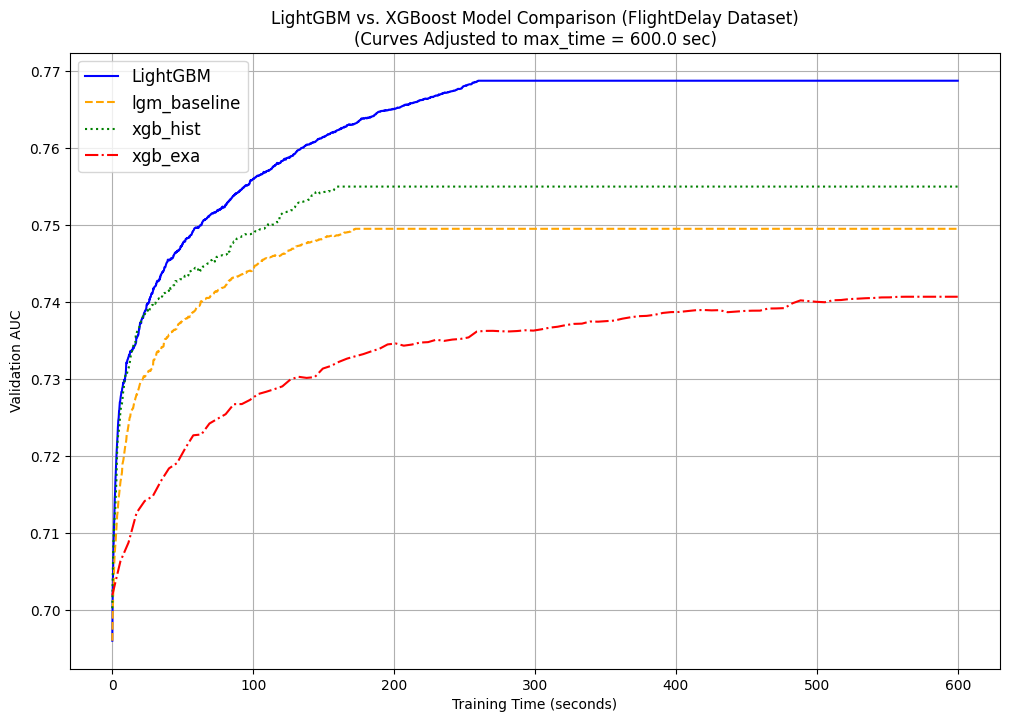

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# --- Modified Helper Function to Extend or Clip the Curve ---
def extend_or_clip_curve(time_array, auc_array, max_time, num_points=10):
    """
    Adjusts a learning curve so that it spans exactly up to max_time.
    
    If the peak AUC occurs before max_time, the curve is extended by padding with a flat line 
    at the peak AUC until max_time.
    If the peak occurs after max_time, the curve is truncated (and interpolated) at max_time.
    
    Parameters:
      - time_array: Array of time stamps for each iteration.
      - auc_array: Array of AUC values.
      - max_time: The time value to which the curve should be extended/truncated.
      - num_points: Number of extra points to use for padding (only when extending).
      
    Returns:
      - adjusted_time: The adjusted time array (up to max_time).
      - adjusted_auc: The adjusted AUC array.
    """
    peak_index = np.argmax(auc_array)
    peak_time = time_array[peak_index]
    peak_auc = auc_array[peak_index]
    
    if peak_time < max_time:
        # Extend the curve to max_time by padding with a flat line at peak_auc.
        time_up_to_peak = time_array[:peak_index+1]
        auc_up_to_peak = auc_array[:peak_index+1]
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_auc = np.full_like(extra_time, peak_auc)
        adjusted_time = np.concatenate([time_up_to_peak, extra_time])
        adjusted_auc = np.concatenate([auc_up_to_peak, extra_auc])
    else:
        # The peak occurs after max_time, so clip the curve.
        # Find indices where time is less than or equal to max_time.
        valid_idx = np.where(time_array <= max_time)[0]
        if valid_idx.size == 0:
            # If no point is before max_time, then simply interpolate between first two points.
            adjusted_time = np.array([max_time])
            adjusted_auc = np.interp(max_time, time_array[:2], auc_array[:2])
        else:
            last_valid = valid_idx[-1]
            adjusted_time = time_array[:last_valid+1].copy()
            adjusted_auc = auc_array[:last_valid+1].copy()
            # If the last valid time isn't exactly max_time, interpolate an extra point.
            if adjusted_time[-1] < max_time:
                interp_auc = np.interp(max_time, time_array[last_valid:last_valid+2], auc_array[last_valid:last_valid+2])
                adjusted_time = np.concatenate([adjusted_time, [max_time]])
                adjusted_auc = np.concatenate([adjusted_auc, [interp_auc]])
    return adjusted_time, adjusted_auc

# --- Use your actual data (no synthetic data is created) ---
# Extract AUC values and generate time stamps for LightGBM (EFB Enabled and Disabled)
auc_with_efb = np.array(evals_result_with_efb['validation']['auc'])
auc_without_efb = np.array(evals_result_without_efb['validation']['auc'])
time_with_efb = np.linspace(0, training_time_with_efb, len(auc_with_efb))
time_without_efb = np.linspace(0, training_time_without_efb, len(auc_without_efb))

# Extract AUC values and generate time stamps for XGBoost Histogram and Exact Splitting models
auc_hist = np.array(evals_result_xgb_hist['validation']['auc'])
time_hist = np.linspace(0, training_time_xgb, len(auc_hist))
auc_exact = np.array(evals_result_xgb_exact['validation']['auc'])
time_exact = np.linspace(0, training_time_xgb_exact, len(auc_exact))

# --- Manual Control for Maximum Time ---
# Set the maximum time for curve adjustment. For example, to display curves only up to 30 seconds:
manual_max_time = 600  # Adjust this value as needed

# Adjust curves for each model using the new helper function.
ext_time_with_efb, ext_auc_with_efb = extend_or_clip_curve(time_with_efb, auc_with_efb, manual_max_time)
ext_time_without_efb, ext_auc_without_efb = extend_or_clip_curve(time_without_efb, auc_without_efb, manual_max_time)
ext_time_hist, ext_auc_hist = extend_or_clip_curve(time_hist, auc_hist, manual_max_time)
ext_time_exact, ext_auc_exact = extend_or_clip_curve(time_exact, auc_exact, manual_max_time)

# --- Combined Plot ---
plt.figure(figsize=(12, 8))

# Plot LightGBM models
plt.plot(ext_time_with_efb, ext_auc_with_efb, label='LightGBM', color='blue', linestyle='-')
plt.plot(ext_time_without_efb, ext_auc_without_efb, label='lgm_baseline', color='orange', linestyle='--')

# Plot XGBoost models
plt.plot(ext_time_hist, ext_auc_hist, label='xgb_hist', color='green', linestyle='dotted')
plt.plot(ext_time_exact, ext_auc_exact, label='xgb_exa', color='red', linestyle='dashdot')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation AUC")
plt.title("LightGBM vs. XGBoost Model Comparison (FlightDelay Dataset)\n(Curves Adjusted to max_time = {:.1f} sec)".format(manual_max_time))
plt.legend(fontsize=12)
plt.grid(True)
#plt.show()

plt.savefig("flight_delay_3_1.png")
